# This notebook shows how to use ProbeLabeler 
- ProbeLabeler (created by C. Devitre - https://github.com/cljdevitre/ProbeLabeler) is designed to label images taken on electron microprobes, based on the coordinates of the image and the coordinates of datapoints. It has only been tested for use with JEOL probes and with excel data as exported by Probe for EPMA software (https://www.probesoftware.com/). If you need other applications, contact me, I can implement more options.

## First, let's install ProbeLabeler (only need to run this once)
- Make sure you replace the path (C:/Users/charl/Documents/Python%20dev/ProbeLabeler) with the path of the folder where you downloaded ProbeLabeler
- Note, you can also use ProbeLabeler by placing the jeol_labeler.py file inside the folder you are using this notebook from. If you opt to do that, skip the !pip install command and make sure to replace ProbeLabeler with jeol_labeler in the "import ProbeLabeler as pl" command. 

In [11]:
!pip install "file:C:/Users/charl/Documents/Python%20dev/ProbeLabeler"

## Next import the package
- Note, you can also use ProbeLabeler by placing the jeol_labeler.py file inside the folder you are using this notebook from. If you opt to do that, make sure to replace ProbeLabeler with jeol_labeler in the next cell 

In [12]:
import ProbeLabeler as pl # Replace ProbeLabeler with jeol_labeler if you opted to bypass the pip install and placed the jeol_labeler.py file inside your current folder

## We can label a single image

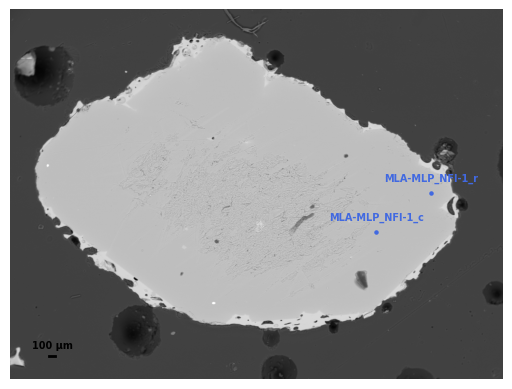

In [13]:
# Set these to appropriate paths and names for your data
image_path =r"C:\Users\charl\Documents\Python dev\ProbeLabeler\docs\Image_examples"  # Path where images and metadata are stored
data_path = r"C:\Users\charl\Documents\Python dev\ProbeLabeler\docs\Data_Folder" # Path where your data excel file is stored (Output from Probe for EPMA)
data_table = 'Data_example.xlsx' # This is the name of your datatable (excel file)
sheet_name = 'Sheet1' # Sheet name where the data is

image_file = "MLA-MLP_NFI-1.tif" #Name of the image you want to process

# Next is the configuration setup, it controls dot size and color, text size, color and positioning, white box behind text or not, scale bar size and color, etc. 
# You can run it with the defaults, or you can change as you want. 
# suffix specifies what suffix is at the end of the name of the files,

# IMPORTANT_NOTE: I highly recommend adding a suffix to your "SAMPLE" column in the data excel file, here the default is -, _ or . 
# Just add _ , - or . at the end of all your sample names in excel

config=pl.ImageAnnotatorConfig() # This will use the default configuration

# If you want to change anything (color, text size, etc), uncomment the following "config=..." and change it as desired 
# (i.e., point_color='k' will plot the point in black instead of royal blue):

# config = ImageAnnotatorConfig(
#     point_color='royalblue',
#     text_color='royalblue',
#     scalebar_color='k',
#     scalebar_text_color='k',
#     point_size=5,
#     text_offset_x=0,
#     text_offset_y=-30,
#     font_size=7,
#     font_thickness=2,
#     scalebar_xy=(100, 900),
#     scalebar_thickness=2,
#     suffix="[-_.]",
#     meta_extension=".txt",
#     Sample_ID='SAMPLE',
#     xposition='X_POS', 
#     yposition='Y_POS'
# )

annotated_image = pl.annotate_image(image_path, data_path, data_table, sheet_name, image_file, config,plot_result=True,save_fig='pdf',show_bbox=False)

## Or we can loop through all the images in a folder

In [14]:
# Set your paths and names here
image_path = r"C:\Users\charl\Documents\Python dev\ProbeLabeler\docs\Image_examples"
data_path = r"C:\Users\charl\Documents\Python dev\ProbeLabeler\docs\Data_Folder"
data_table = 'Data_example.xlsx'
sheet_name = 'Sheet1'

image_extension = '.tif' #extension of original image
save_fig='pdf' # what format for output image
plot_result=False # plot results here
show_bbox=True # white box behind text or not

# Now loop through the images
pl.process_images(image_path, data_path, data_table, sheet_name, image_extension=image_extension,save_fig=save_fig,plot_result=plot_result, show_bbox=show_bbox)

['MLA-MLP_NFI-1.tif', 'MLA-MLP_NFI-10.tif', 'MLA-MLP_NFI-11.tif', 'MLA-MLP_NFI-21.tif', 'MLA-MLP_NFI-5.tif', 'MLA-MP2_NFI-16.tif', 'MLA-MP2_NFI-17.tif']


Processing:   0%|          | 0/7 [00:00<?, ?it/s]